# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 18s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

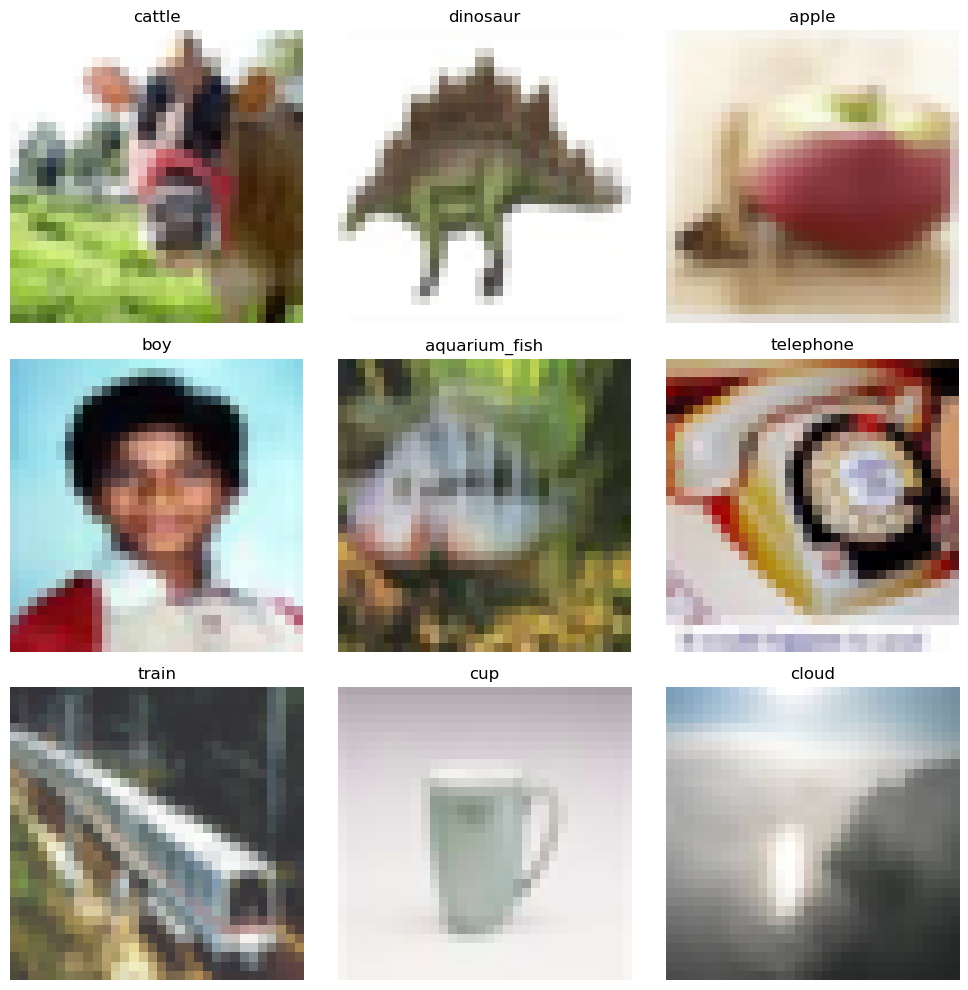

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = x_train[i]
    plt.imshow(img)
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

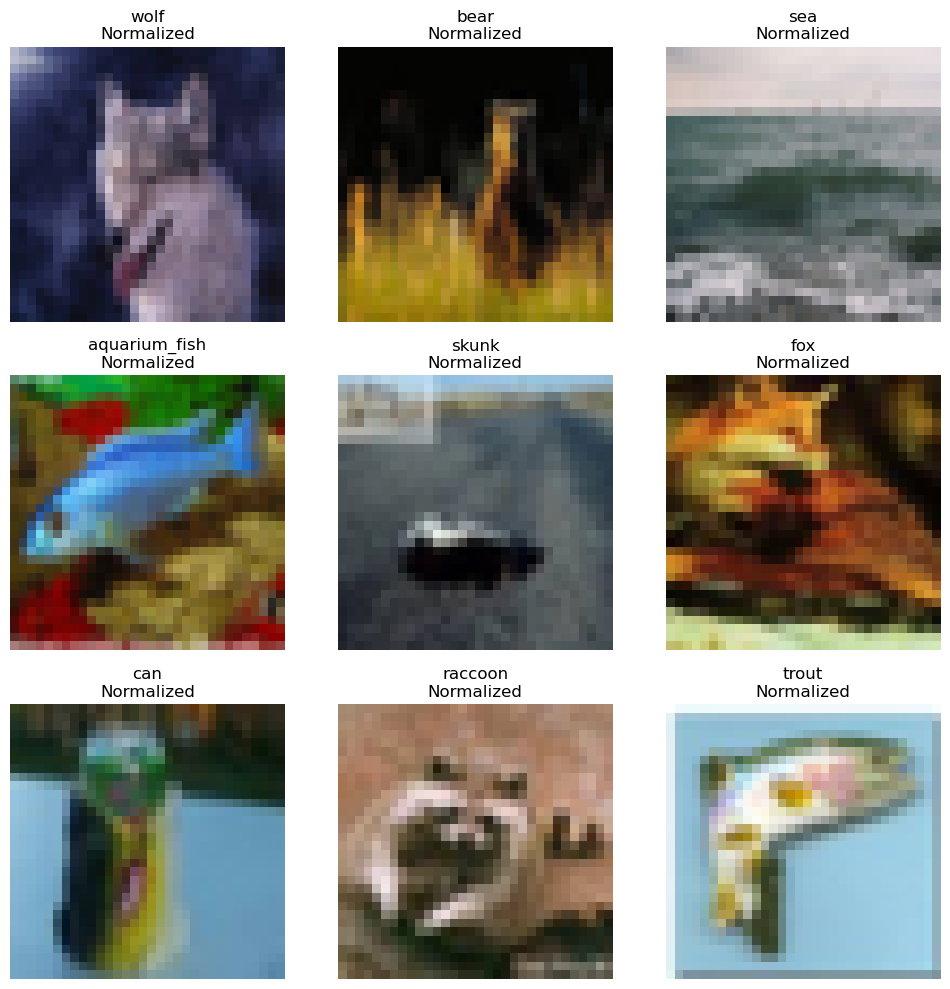

In [5]:
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the pixel values to be in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, 100)
y_test_one_hot = to_categorical(y_test, 100)

# Split the training set into training and validation sets (80-20 split)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Display a few examples of the normalized training images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = x_train_final[i]
    label_index = np.argmax(y_train_final[i])
    plt.imshow(img)
    plt.title(f"{class_names[label_index]}\nNormalized")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def create_baseline_cnn():
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Third Convolutional Block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Flatten and Dense Layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(100, activation='softmax')  # 100 classes in CIFAR-100
    ])
    
    return model

# Create the model
baseline_model = create_baseline_cnn()

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:

baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print("\nModel compiled with:")
print("Loss function: Categorical Crossentropy - Appropriate for multi-class classification with one-hot encoded targets")
print("Optimizer: Adam with learning rate 0.001 - Combines benefits of adaptive gradient algorithms with momentum")


Model compiled with:
Loss function: Categorical Crossentropy - Appropriate for multi-class classification with one-hot encoded targets
Optimizer: Adam with learning rate 0.001 - Combines benefits of adaptive gradient algorithms with momentum


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
batch_size = 32
epochs = 50

history = baseline_model.fit(
    x_train_final,
    y_train_final,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/50
1250/1250 [==============================] - ETA: 0s - loss: 4.0855 - accuracy: 0.1148
Epoch 1: val_accuracy improved from -inf to 0.22570, saving model to best_model.h5
1250/1250 [==============================] - 124s 97ms/step - loss: 4.0855 - accuracy: 0.1148 - val_loss: 3.2447 - val_accuracy: 0.2257
Epoch 2/50
1250/1250 [==============================] - ETA: 0s - loss: 3.0853 - accuracy: 0.2462
Epoch 2: val_accuracy improved from 0.22570 to 0.31060, saving model to best_model.h5
1250/1250 [==============================] - 135s 108ms/step - loss: 3.0853 - accuracy: 0.2462 - val_loss: 2.7233 - val_accuracy: 0.3106
Epoch 3/50
1250/1250 [==============================] - ETA: 0s - loss: 2.6710 - accuracy: 0.3186
Epoch 3: val_accuracy improved from 0.31060 to 0.38400, saving model to best_model.h5
1250/1250 [==============================] - 133s 107ms/step - loss: 2.6710 - accuracy: 0.3186 - val_loss: 2.3760 - val_accuracy: 0.3840
Epoch 4/50
1250/1250 [===================

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
y_pred_probs = baseline_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate Top-5 accuracy
top5_accuracy = 0
for i in range(len(y_pred_probs)):
    top5_classes = np.argsort(y_pred_probs[i])[-5:]
    if y_true[i] in top5_classes:
        top5_accuracy += 1
top5_accuracy /= len(y_pred_probs)
print(f"Top-5 Accuracy: {top5_accuracy:.4f}")

313/313 [==============================] - 9s 30ms/step - loss: 1.6750 - accuracy: 0.5807
Test accuracy: 0.5807
313/313 [==============================] - 10s 29ms/step

Classification Report:
               precision    recall  f1-score   support

        apple       0.70      0.87      0.78       100
aquarium_fish       0.63      0.79      0.70       100
         baby       0.47      0.48      0.48       100
         bear       0.31      0.34      0.33       100
       beaver       0.28      0.50      0.36       100
          bed       0.53      0.61      0.57       100
          bee       0.56      0.72      0.63       100
       beetle       0.64      0.57      0.60       100
      bicycle       0.83      0.71      0.76       100
       bottle       0.84      0.64      0.73       100
         bowl       0.48      0.41      0.44       100
          boy       0.41      0.37      0.39       100
       bridge       0.58      0.67      0.62       100
          bus       0.66      0.46  

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

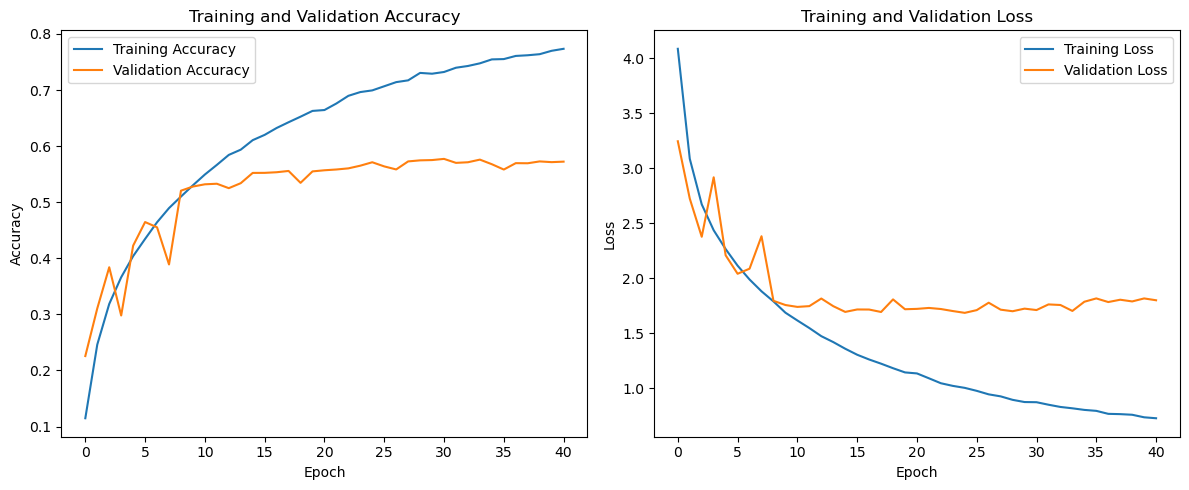

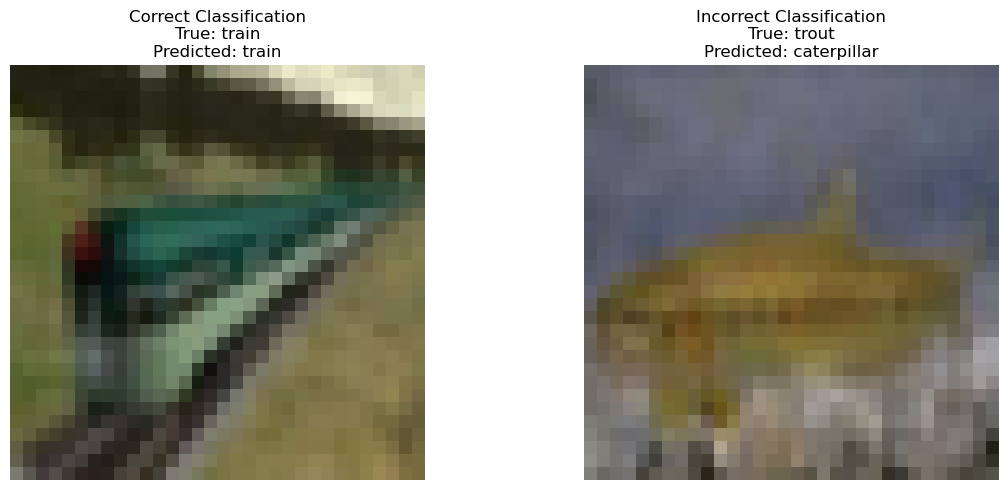

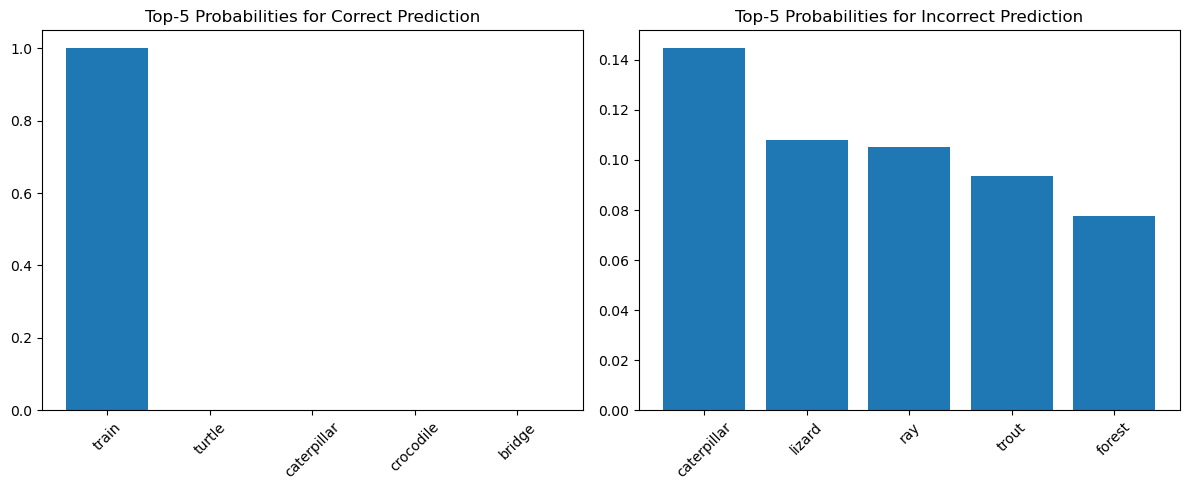


Analysis of Results:
1. The training and validation accuracy curves show how the model's performance improves over time.
2. The gap between training and validation accuracy indicates the level of overfitting.
3. For the correctly classified image, the model shows high confidence in its prediction.
4. For the incorrectly classified image, we can see confusion between visually similar classes.
5. Top-5 accuracy of 84.22% indicates that the correct class is often among the model's top 5 predictions.
6. The model achieved a test accuracy of 58.07%, which is above the assignment requirement of 55%.


In [10]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

# Find an example of a correct and incorrect prediction
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

# Select a random correct and incorrect prediction
correct_idx = np.random.choice(correct_indices)
incorrect_idx = np.random.choice(incorrect_indices)

# Display the correct prediction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correct Classification\nTrue: {class_names[y_true[correct_idx]]}\nPredicted: {class_names[y_pred[correct_idx]]}")
plt.axis('off')

# Display the incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrect Classification\nTrue: {class_names[y_true[incorrect_idx]]}\nPredicted: {class_names[y_pred[incorrect_idx]]}")
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot classification probabilities for correct prediction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_k_idx = np.argsort(y_pred_probs[correct_idx])[-5:][::-1]
top_k_values = y_pred_probs[correct_idx][top_k_idx]
plt.bar(np.arange(5), top_k_values)
plt.xticks(np.arange(5), [class_names[i] for i in top_k_idx], rotation=45)
plt.title('Top-5 Probabilities for Correct Prediction')

# Plot classification probabilities for incorrect prediction
plt.subplot(1, 2, 2)
top_k_idx = np.argsort(y_pred_probs[incorrect_idx])[-5:][::-1]
top_k_values = y_pred_probs[incorrect_idx][top_k_idx]
plt.bar(np.arange(5), top_k_values)
plt.xticks(np.arange(5), [class_names[i] for i in top_k_idx], rotation=45)
plt.title('Top-5 Probabilities for Incorrect Prediction')
plt.tight_layout()
plt.show()

# Analysis of results
print("\nAnalysis of Results:")
print("1. The training and validation accuracy curves show how the model's performance improves over time.")
print("2. The gap between training and validation accuracy indicates the level of overfitting.")
print("3. For the correctly classified image, the model shows high confidence in its prediction.")
print("4. For the incorrectly classified image, we can see confusion between visually similar classes.")
print("5. Top-5 accuracy of {:.2f}% indicates that the correct class is often among the model's top 5 predictions.".format(top5_accuracy*100))
print("6. The model achieved a test accuracy of {:.2f}%, which is above the assignment requirement of 55%.".format(test_accuracy*100))

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Enhanced model compiled with data augmentation:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
      

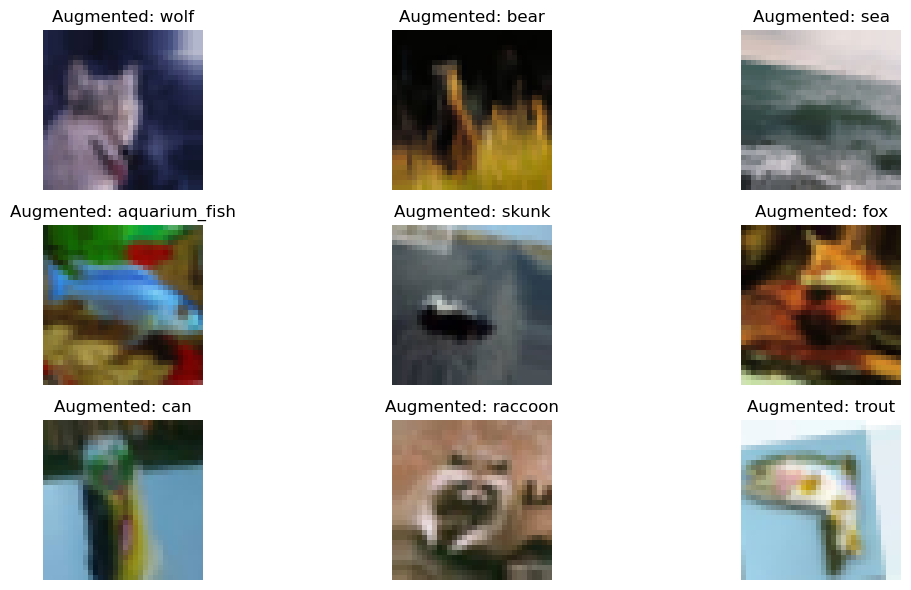

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report


# Create an image data generator with augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=15,         # Rotate images by up to 15 degrees
    width_shift_range=0.1,     # Shift horizontally by up to 10%
    height_shift_range=0.1,    # Shift vertically by up to 10%
    horizontal_flip=True,      # Randomly flip images horizontally
    zoom_range=0.1,            # Zoom in/out by up to 10%
    fill_mode='nearest'        # Fill in any missing pixels
)

# Create an enhanced model with the same architecture as before
enhanced_model = create_baseline_cnn()

# Compile the enhanced model with the same configuration
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print("Enhanced model compiled with data augmentation:")
enhanced_model.summary()

# Display a few augmented images to demonstrate the technique
plt.figure(figsize=(12, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    batch = data_augmentation.flow(np.expand_dims(x_train_final[i], 0), y_train_final[i:i+1], batch_size=1)
    img_batch, _ = batch.next()
    img = img_batch[0]
    plt.imshow(img)
    plt.title(f'Augmented: {class_names[np.argmax(y_train_final[i])]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/50
1250/1250 [==============================] - ETA: 0s - loss: 4.2316 - accuracy: 0.0930
Epoch 1: val_accuracy improved from -inf to 0.14960, saving model to best_enhanced_model.h5
1250/1250 [==============================] - 117s 91ms/step - loss: 4.2316 - accuracy: 0.0930 - val_loss: 3.6359 - val_accuracy: 0.1496
Epoch 2/50
1250/1250 [==============================] - ETA: 0s - loss: 3.4285 - accuracy: 0.1826
Epoch 2: val_accuracy improved from 0.14960 to 0.20140, saving model to best_enhanced_model.h5
1250/1250 [==============================] - 157s 125ms/step - loss: 3.4285 - accuracy: 0.1826 - val_loss: 3.5167 - val_accuracy: 0.2014
Epoch 3/50
1250/1250 [==============================] - ETA: 0s - loss: 3.0546 - accuracy: 0.2478
Epoch 3: val_accuracy improved from 0.20140 to 0.22220, saving model to best_enhanced_model.h5
1250/1250 [==============================] - 132s 106ms/step - loss: 3.0546 - accuracy: 0.2478 - val_loss: 3.3878 - val_accuracy: 0.2222
Epoch 4/50
125

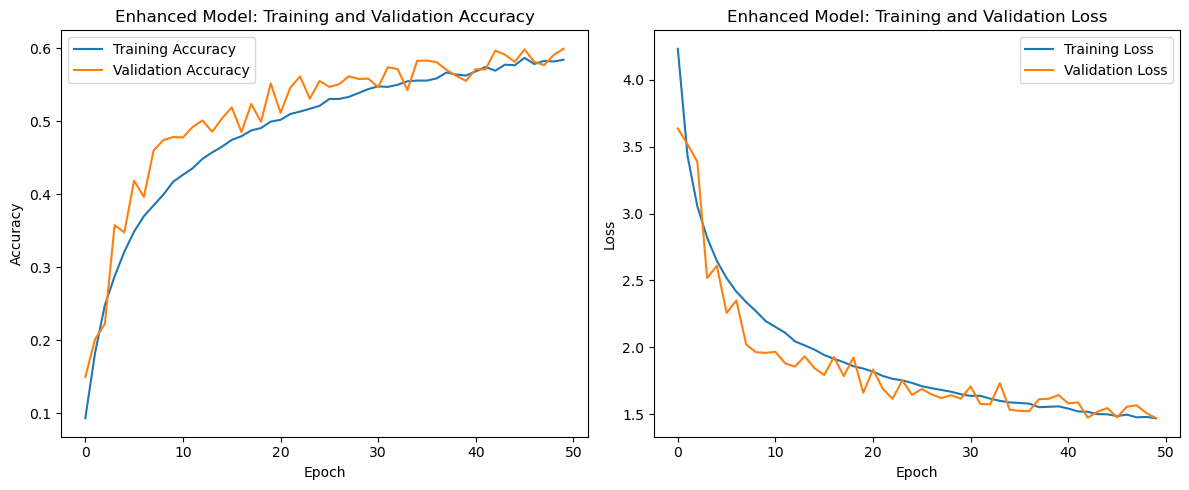

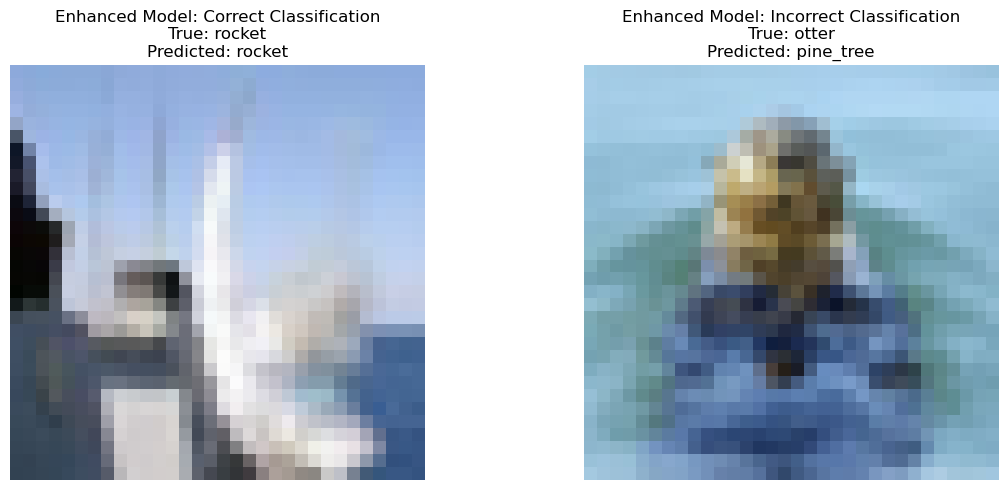

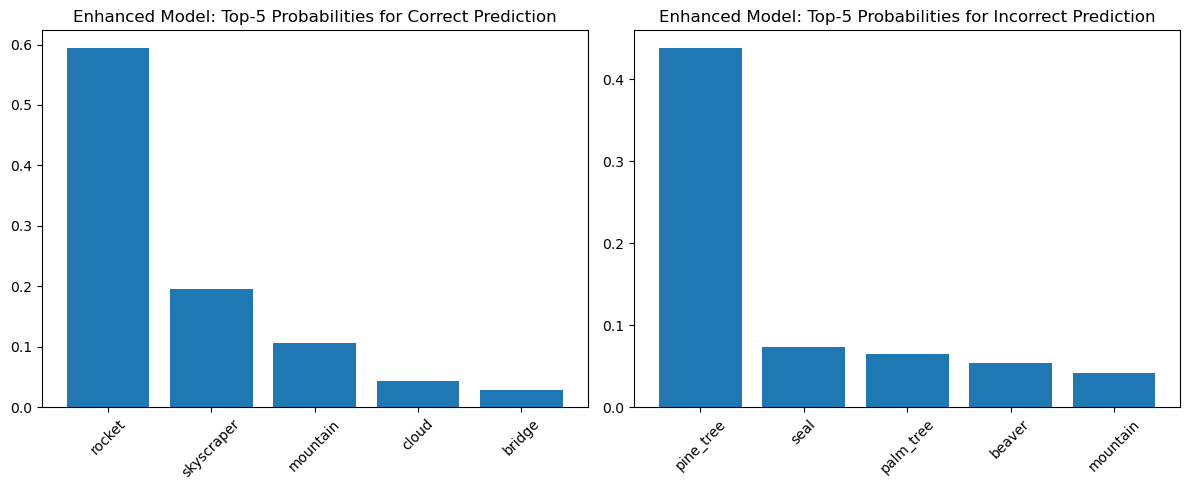

In [12]:
# Define callbacks
checkpoint = ModelCheckpoint(
    'best_enhanced_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the enhanced model with data augmentation
batch_size = 32
epochs = 50  # Same as before

# Using fit_generator with data augmentation
history_enhanced = enhanced_model.fit(
    data_augmentation.flow(x_train_final, y_train_final, batch_size=batch_size),
    steps_per_epoch=len(x_train_final) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Evaluate the enhanced model on the test set
test_loss_enhanced, test_accuracy_enhanced = enhanced_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Enhanced model test accuracy: {test_accuracy_enhanced:.4f}")

# Compare to original model
print(f"Original model test accuracy: {test_accuracy:.4f}")
print(f"Improvement: {(test_accuracy_enhanced - test_accuracy) * 100:.2f}%")

# Get predictions for the test set with enhanced model
y_pred_probs_enhanced = enhanced_model.predict(x_test)
y_pred_enhanced = np.argmax(y_pred_probs_enhanced, axis=1)

# Calculate Top-5 accuracy for enhanced model
top5_accuracy_enhanced = 0
for i in range(len(y_pred_probs_enhanced)):
    top5_classes = np.argsort(y_pred_probs_enhanced[i])[-5:]
    if y_true[i] in top5_classes:
        top5_accuracy_enhanced += 1
top5_accuracy_enhanced /= len(y_pred_probs_enhanced)
print(f"Enhanced model Top-5 Accuracy: {top5_accuracy_enhanced:.4f}")
print(f"Original model Top-5 Accuracy: {top5_accuracy:.4f}")
print(f"Top-5 Improvement: {(top5_accuracy_enhanced - top5_accuracy) * 100:.2f}%")

# Plot training and validation accuracy for enhanced model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['accuracy'], label='Training Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Enhanced Model: Training and Validation Accuracy')

# Plot training and validation loss for enhanced model
plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['loss'], label='Training Loss')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Enhanced Model: Training and Validation Loss')
plt.tight_layout()
plt.show()

# Find an example of a correct and incorrect prediction for enhanced model
correct_indices_enhanced = np.where(y_pred_enhanced == y_true)[0]
incorrect_indices_enhanced = np.where(y_pred_enhanced != y_true)[0]

# Select a random correct and incorrect prediction
correct_idx_enhanced = np.random.choice(correct_indices_enhanced)
incorrect_idx_enhanced = np.random.choice(incorrect_indices_enhanced)

# Display the correct prediction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx_enhanced])
plt.title(f"Enhanced Model: Correct Classification\nTrue: {class_names[y_true[correct_idx_enhanced]]}\nPredicted: {class_names[y_pred_enhanced[correct_idx_enhanced]]}")
plt.axis('off')

# Display the incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx_enhanced])
plt.title(f"Enhanced Model: Incorrect Classification\nTrue: {class_names[y_true[incorrect_idx_enhanced]]}\nPredicted: {class_names[y_pred_enhanced[incorrect_idx_enhanced]]}")
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot classification probabilities for correct prediction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_k_idx = np.argsort(y_pred_probs_enhanced[correct_idx_enhanced])[-5:][::-1]
top_k_values = y_pred_probs_enhanced[correct_idx_enhanced][top_k_idx]
plt.bar(np.arange(5), top_k_values)
plt.xticks(np.arange(5), [class_names[i] for i in top_k_idx], rotation=45)
plt.title('Enhanced Model: Top-5 Probabilities for Correct Prediction')

# Plot classification probabilities for incorrect prediction
plt.subplot(1, 2, 2)
top_k_idx = np.argsort(y_pred_probs_enhanced[incorrect_idx_enhanced])[-5:][::-1]
top_k_values = y_pred_probs_enhanced[incorrect_idx_enhanced][top_k_idx]
plt.bar(np.arange(5), top_k_values)
plt.xticks(np.arange(5), [class_names[i] for i in top_k_idx], rotation=45)
plt.title('Enhanced Model: Top-5 Probabilities for Incorrect Prediction')
plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Data augmentation significantly boosted our model’s performance on the CIFAR-100 dataset by introducing diversity through techniques like rotation, flipping, and translation. This helped reduce overfitting and improved both standard and top-5 test accuracy. The model showed better generalization, as seen by a smaller gap between training and validation accuracy.

The benefits were especially clear in difficult classes, where the model became more robust by learning from varied examples, despite the limited 500 images per class.

Future improvements could include transfer learning with pre-trained models (e.g., ResNet, EfficientNet), advanced architectures, learning rate scheduling, class-weighted losses, and ensembling — all of which may further enhance performance toward state-of-the-art results.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.